# Exploring AI Integration in Professional Developer Workflows
**Introduction**

In this analysis, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow in 2024. You can find the raw data & official analysis here: https://survey.stackoverflow.co/.

This project explores how AI tools are integrated into professional developers' workflows, examining the development process where AI is used, the benefits it provides, and developers' perceptions of AI as a potential threat to their jobs.

Let's import necessary libraries and download the datasets.

In [65]:
import os 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#11110000'

In [ ]:
# !pip install gdown

In [ ]:
survey_id = '1o2L4RXV1LohTH-MXQ_Dp9v_6lLheSaaW'
schema_id='1yJxt1IGiQUQivX6bldtLVMT0h1NL4il5'
survey_url = f'https://drive.google.com/uc?id={survey_id}'
schema_url= f'https://drive.google.com/uc?id={schema_id}'

survey_output = './stack-overflow-developer-survey-2024/survey_results_public.csv'
schema_output='./stack-overflow-developer-survey-2024/survey_results_schema.csv'

In [115]:
import gdown

if 'survey_results_public.csv' not in  os.listdir('./stack-overflow-developer-survey-2024'):
    gdown.download(survey_url, survey_output, quiet=False)
if 'survey_results_schema.csv' not in  os.listdir('./stack-overflow-developer-survey-2024'):
    gdown.download(schema_url,schema_output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yJxt1IGiQUQivX6bldtLVMT0h1NL4il5
To: C:\Users\ttnla\learning\GitHub\Jupyter\eda_ai_integration_stof_2024\stack-overflow-developer-survey-2024\survey_results_schema.csv
100%|██████████| 12.5k/12.5k [00:00<00:00, 884kB/s]


>We've downloaded the datasets, so we have 'survey_results_schema.csv' and 'survey_results_public.csv' ready in the current folder.
>
>The schema file contains shortcodes for questions used as column names in survey_results_public.csv and the full text of each question.

In [67]:
schema_df=pd.read_csv('./stack-overflow-developer-survey-2024/survey_results_schema.csv',
                     index_col='qname').question

In [68]:
# schema_df.index

In [69]:
survey_df=pd.read_csv('./stack-overflow-developer-survey-2024/survey_results_public.csv')

In [70]:
# list(survey_df.columns)

In [71]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


>The dataset contains 114 columns and 65437 responses. 

## Data Preparation
We will select a subset of columns containing the relevant data for our analysis from the dataset.

In [72]:
columns=['MainBranch', 'LearnCodeOnline', 'TechDoc',
         'AISelect', 'AIBen',
         'AISearchDevHaveWorkedWith', #'AISearchDevWantToWorkWith','AISearchDevAdmired',#27
         'AIToolCurrently Using', #'AIToolInterested in Using', 'AIToolNot interested in Using',
         'AIThreat']

In [73]:
survey_df=survey_df[columns]
survey_df.shape

(65437, 8)

In [74]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MainBranch                 65437 non-null  object
 1   LearnCodeOnline            49237 non-null  object
 2   TechDoc                    40897 non-null  object
 3   AISelect                   60907 non-null  object
 4   AIBen                      36894 non-null  object
 5   AISearchDevHaveWorkedWith  44453 non-null  object
 6   AIToolCurrently Using      35072 non-null  object
 7   AIThreat                   44689 non-null  object
dtypes: object(8)
memory usage: 4.0+ MB


### Survey Questions
Let's print out the survey questions for the columns we extracted from *schema* dataset to understand what we will analyze.

In [75]:
for column in columns:
    if column.startswith('AISearchDev'):
        print(f'\033[1m{column}\n\033[0m{schema_df['AISearchDev']}\n')
    elif str(column).startswith('AITool'):
        print(f'\033[1m{column}\n\033[0m{schema_df['AITool']}\n') 
    else:
        print(f'\033[1m{column}\n\033[0m{schema_df[column]}\n')

MainBranch
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*

LearnCodeOnline
What online resources do you use to learn to code? Select all that apply.

TechDoc
What is the source of the technical documentation you use most often to learn to code?  Select all that apply.

AISelect
Do you currently use AI tools in your development process? *

AIBen
For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.

AISearchDevHaveWorkedWith
Which <b>AI-powered search and developer tools</b> did you use regularly over the past year, and which do you want to work with over the next year? Select all that apply.

AIToolCurrently Using
Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year?  Please select all that apply.

AIThreat
D

### Roles of Respondents
We will study the MainBranch column to understand how the different types of coders are represented in the survey.

In [76]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [77]:
main_branch_df=split_multicolumn(survey_df['MainBranch'])
# main_branch_df

In [78]:
main_branch_totals = main_branch_df.sum().sort_values(ascending=False)
# main_branch_totals

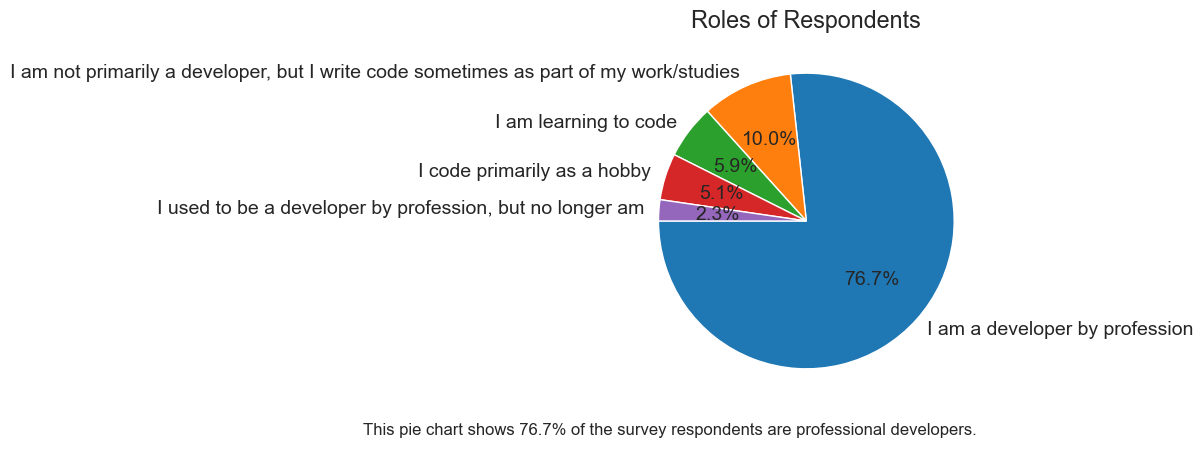

In [79]:
plt.pie(main_branch_totals,labels=main_branch_totals.index,
        autopct='%1.1f%%', startangle=180)
plt.figtext(0.3, .05, 
            '''This pie chart shows 76.7% of the survey respondents are professional developers.''', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.title('Roles of Respondents');

>76.7% of the survey respondents are professional developers. We will filter the dataset to include only these professional developers for our analysis.

### Dataset with Professional Developers Only
There are various individuals who engage in coding beyond professional developers. However, this analysis will focus exclusively on professional developers.

In [80]:
survey_df=survey_df[survey_df.MainBranch=='I am a developer by profession']

In [81]:
survey_df.shape

(50207, 8)

## Exploratory Data Analysis
### AI in Learning to Code

#### AI as a Resource to Learn to Code
**LearnCodeOnline**: What online resources do you use to learn to code? Select all that apply.

In [82]:
schema_df['LearnCodeOnline']

'What online resources do you use to learn to code? Select all that apply.'

In [83]:
learn_code_online_df = split_multicolumn(survey_df.LearnCodeOnline)

In [84]:
learn_code_online_df.shape

(50207, 17)

In [85]:
learn_code_online_totals = learn_code_online_df.sum().sort_values(ascending=False)
learn_code_online_totals=learn_code_online_totals/learn_code_online_df.shape[0]*100

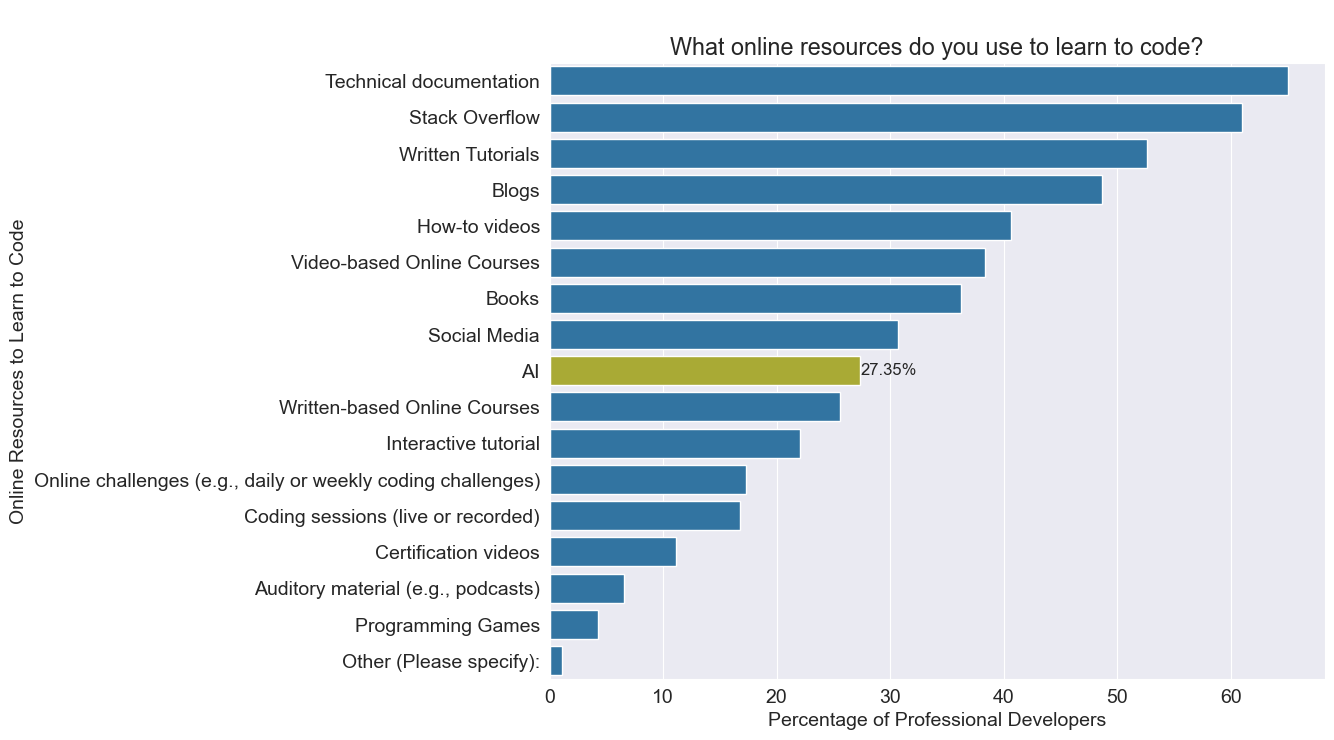

In [86]:
plt.figure(figsize=(10,8))

# '#DD8452'
colors = [sns.color_palette()[0] if i != 8 else sns.color_palette()[8] for i in range(len(learn_code_online_totals))]

ax=sns.barplot(x=learn_code_online_totals,
            y=learn_code_online_totals.index,
            hue=learn_code_online_totals.index,  # Assign y variable to hue
            # dodge=False,  # Prevents splitting bars
            # legend=False,
            palette=colors
           )  
ax.text(learn_code_online_totals['AI'], 8, 
        f'{learn_code_online_totals['AI']:.2f}%', 
        ha='left', va='center',fontsize=12)

plt.title('''
What online resources do you use to learn to code?''')
plt.ylabel('Online Resources to Learn to Code')
plt.xlabel('Percentage of Professional Developers');

>27.35% of professional developers use AI to learn to code.

#### AI as a Source of Technical Documentation
**TechDoc**: What is the source of the technical documentation you use most often to learn to code?  Select all that apply.

In [87]:
schema_df.TechDoc

'What is the source of the technical documentation you use most often to learn to code?  Select all that apply.'

In [88]:
tech_doc_df = split_multicolumn(survey_df.TechDoc)
# tech_doc_df.columns

In [89]:
tech_doc_df.shape

(50207, 7)

In [90]:
tech_doc_totals = tech_doc_df.sum().sort_values(ascending=False)
tech_doc_totals=tech_doc_totals/tech_doc_df.shape[0]*100

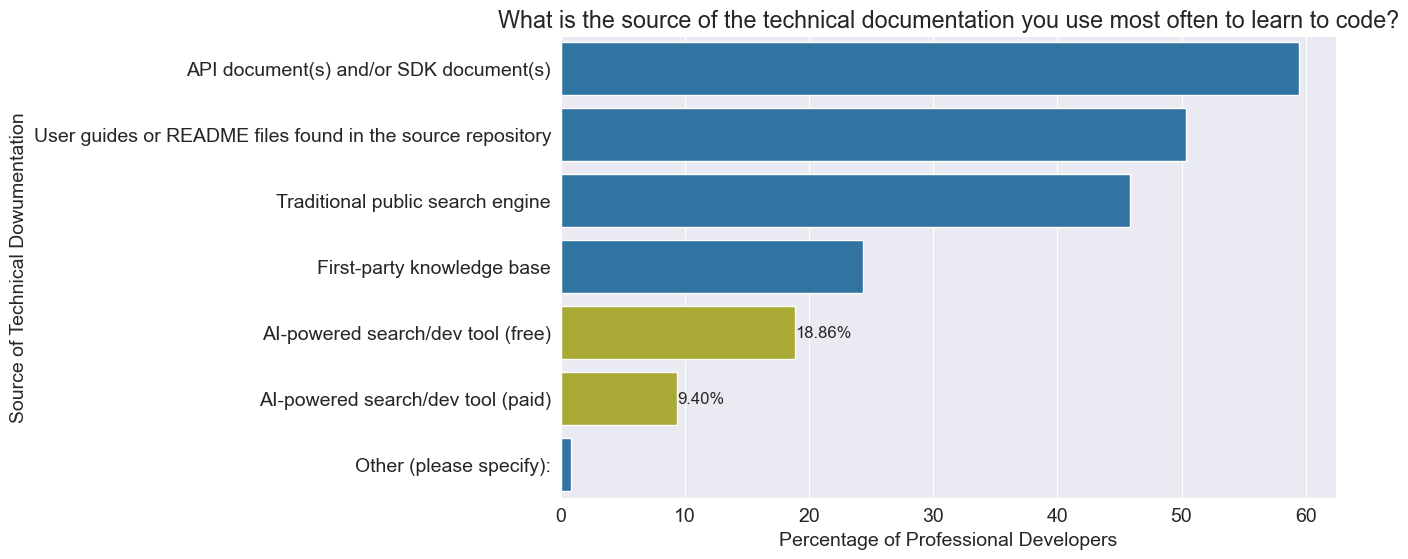

In [91]:
plt.figure(figsize=(10,6))
colors = [sns.color_palette()[0] if i != 4 and i!= 5 else sns.color_palette()[8] for i in range(len(tech_doc_totals))]

ax=sns.barplot(x=tech_doc_totals,
            y=tech_doc_totals.index,
           hue=tech_doc_totals.index,
           palette=colors)

ax.text(tech_doc_totals['AI-powered search/dev tool (free)'], 
        4, f'{tech_doc_totals['AI-powered search/dev tool (free)']:.2f}%', 
        ha='left', va='center',fontsize=12)
ax.text(tech_doc_totals['AI-powered search/dev tool (paid)'], 
        5, f'{tech_doc_totals['AI-powered search/dev tool (paid)']:.2f}%', 
        ha='left', va='center',fontsize=12)

plt.title('What is the source of the technical documentation you use most often to learn to code?')
plt.xlabel('Percentage of Professional Developers')
plt.ylabel('Source of Technical Dowumentation');

>18.86% of professional developers use free AI-powered search/dev tool, and 9.40% use paid AI-powered search/dev tool as their source of technical documentation to learn to code.

In [92]:
# for i in sns.color_palette():
#     print(i)

In [93]:
# sns.color_palette()

### AI in the Development Process

#### Adoption of AI Tools in the Development Process Among Developers
**AISelect**: Do you currently use AI tools in your development process?

In [94]:
schema_df['AISelect']

'Do you currently use AI tools in your development process? *'

In [95]:
ai_select_count=survey_df.groupby('AISelect')['AISelect'].count()
# ai_select_count

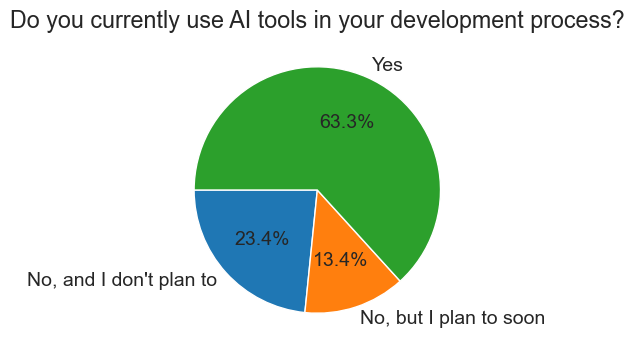

In [96]:
plt.figure(figsize=(6,4))
plt.pie(ai_select_count,labels=ai_select_count.index,
        autopct='%1.1f%%', startangle=180)
plt.title('Do you currently use AI tools in your development process?');
# plt.figtext(0.5, .05, 
#             '''This pie chart shows 63.3% of professional developers currently use AI tools in their development process.''', 
#             wrap=True, horizontalalignment='center', fontsize=12);

>The pie chart shows 63.3% of professional developers currently use AI tools in their development process.

#### The Benefits of AI Tools in Development Workflow
**AIBen**:
For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.

In [97]:
schema_df.AIBen

'For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.'

In [98]:
ai_ben_df = split_multicolumn(survey_df.AIBen)
ai_ben_df.shape

(50207, 7)

In [99]:
ai_ben_totals = ai_ben_df.sum().sort_values(ascending=False)
ai_ben_totals=ai_ben_totals*100/ai_ben_df.shape[0]

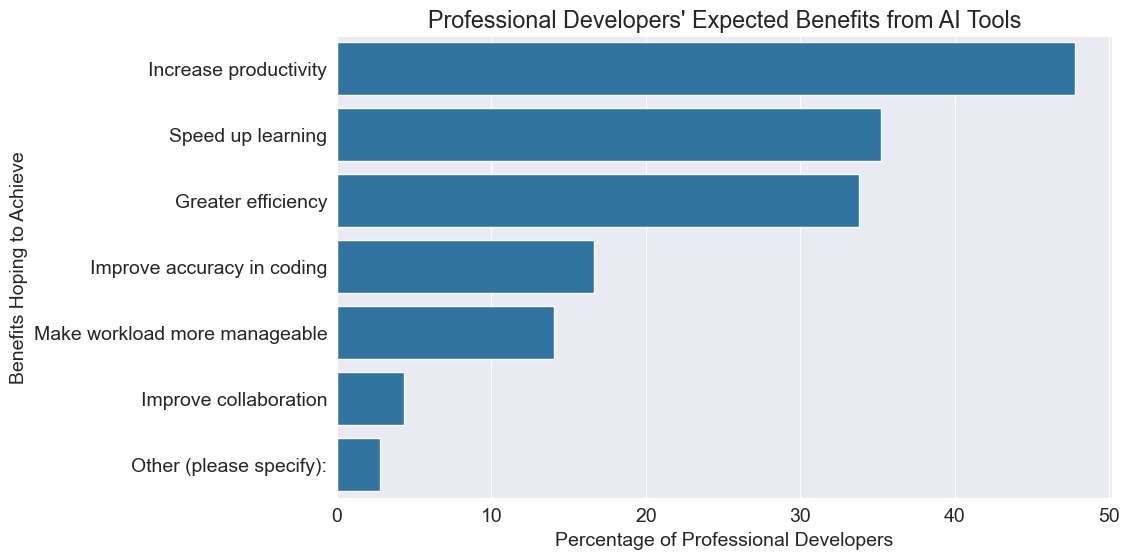

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(x=ai_ben_totals,
            y=ai_ben_totals.index)
plt.ylabel('Benefits Hoping to Achieve')
plt.xlabel('Percentage of Professional Developers')
plt.title("Professional Developers' Expected Benefits from AI Tools");


>The MOST important benefit of using AI tools for professional developers is to increase productivity.

#### AI Usage in Development Workflow
**AITool**: Which parts of your development workflow are you currently using AI tools for?  Please select all that apply.

In [101]:
schema_df['AITool']

'Which parts of your development workflow are you currently using AI tools for and which are you interested in using AI tools for over the next year?  Please select all that apply.'

In [102]:
dev_workflow_df = split_multicolumn(survey_df["AIToolCurrently Using"])
dev_workflow_df
dev_workflow_totals = dev_workflow_df.sum().sort_values(ascending=False)
dev_workflow_totals=dev_workflow_totals*100/dev_workflow_df.shape[0]

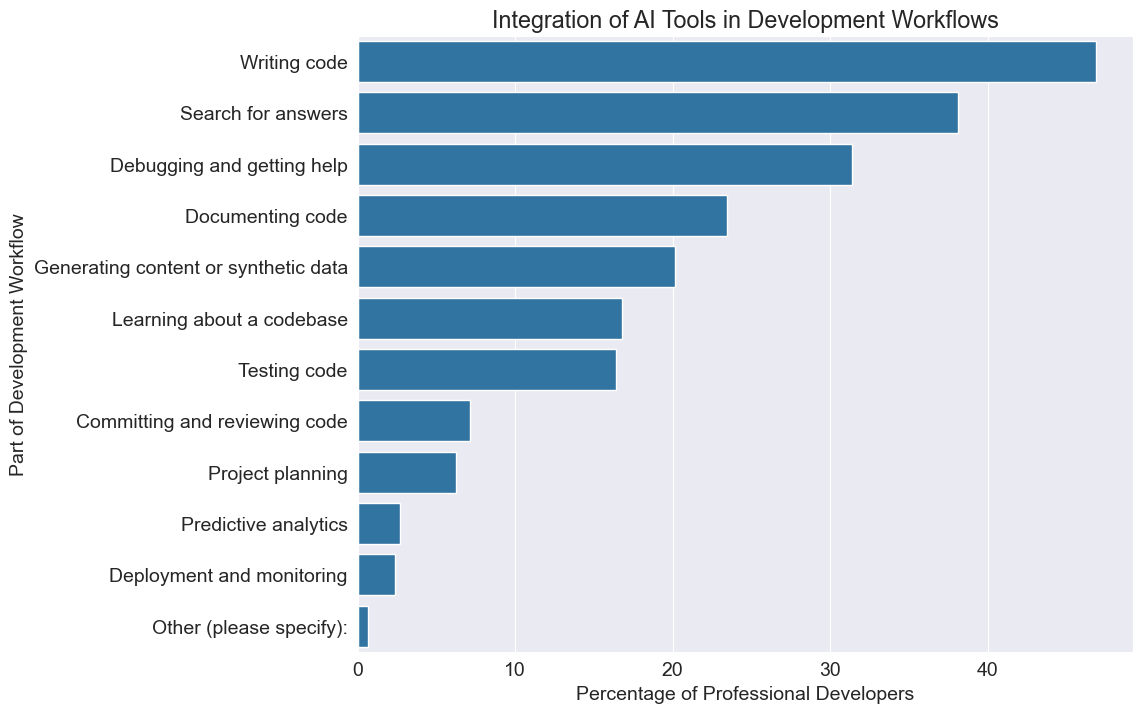

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x=dev_workflow_totals,
            y=dev_workflow_totals.index)
plt.ylabel('Part of Development Workflow')
plt.xlabel('Percentage of Professional Developers')
plt.title('Integration of AI Tools in Development Workflows');

>Most developers primarily use AI tools for writing code within their development workflows.

#### AI-Powered Search and Developer Tools Utilized by Professional Developers
**AISearchDev**: Which AI-powered search and developer tools did you use regularly over the past year?

In [104]:
schema_df['AISearchDev']

'Which <b>AI-powered search and developer tools</b> did you use regularly over the past year, and which do you want to work with over the next year? Select all that apply.'

In [105]:
ai_cur_tool_df=split_multicolumn(survey_df['AISearchDevHaveWorkedWith'])
ai_cur_tool_totals = ai_cur_tool_df.sum().sort_values(ascending=False)
ai_cur_tool_totals=ai_cur_tool_totals*100/ai_cur_tool_df.shape[0]

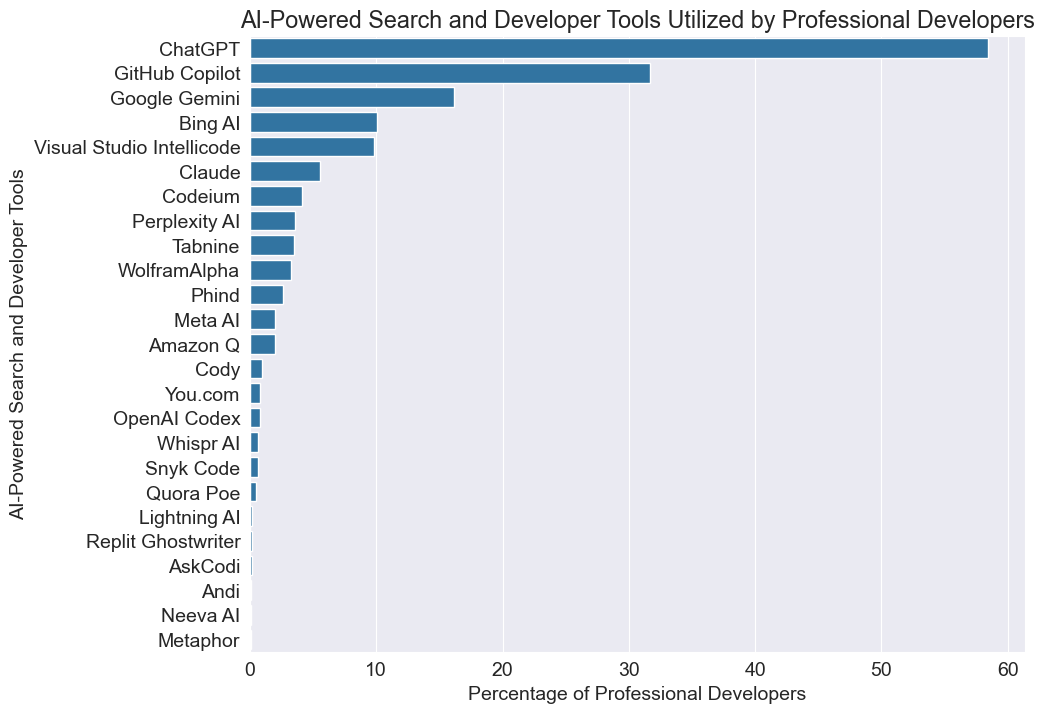

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x=ai_cur_tool_totals,
            y=ai_cur_tool_totals.index)
plt.ylabel('AI-Powered Search and Developer Tools')
plt.xlabel('Percentage of Professional Developers')
plt.title('AI-Powered Search and Developer Tools Utilized by Professional Developers');

>ChatGPT is the most favored AI tool among professional developers.

#### Perception of AI as a Job Threat
**AIThreat**:
Do you believe AI is a threat to your current job?

In [107]:
schema_df['AIThreat']

'Do you believe AI is a threat to your current job?'

In [108]:
ai_threat=survey_df.groupby('AIThreat')['AIThreat'].count()

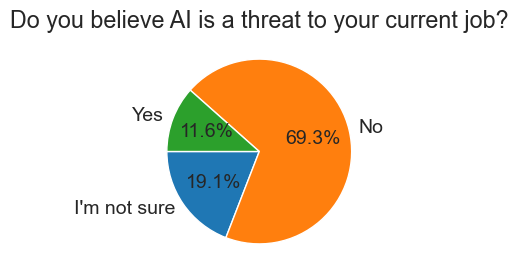

In [109]:
plt.figure(figsize=(6,3))
plt.pie(ai_threat,labels=ai_threat.index,
        autopct='%1.1f%%', startangle=180)
plt.title('Do you believe AI is a threat to your current job?');

>Most developers do not perceive AI as a threat to their jobs.

## Inferences and Conclusions
Based on the StackOverflow 2024 survey results, we can infer that:

* AI has become integrated into learning how to code.
* A significant percentage of programmers use AI as part of their development workflow, primarily in writing code.
* ChatGPT has been the most favored tool among professional developers.
* Although AI has become a part of the development workflow, most developers do not feel that AI is a threat to their jobs.